# Evaluating Classification Models: Custom Metrics and Scikit-Learn Functions

# Introduction

The task of evaluating the performance of classification models is crucial in machine learning, as it enables us to assess the effectiveness of predictive algorithms. In this assignment, we will delve into the intricacies of model evaluation by combining custom Python code functions with pre-built functions from the scikit-learn library. Through this process, we aim to gain a comprehensive understanding of various performance metrics and visualization techniques essential for assessing the accuracy and reliability of binary classification models.

The dataset provided consists of approximately 180 labeled binary observations, where each observation is categorized as either '0' or '1'. By leveraging Python's Pandas library, we will compute a confusion matrix to understand the distribution of true positives, false positives, true negatives, and false negatives. Subsequently, we will develop custom Python functions to calculate essential metrics such as accuracy, precision, sensitivity, specificity, and F1 Score, providing a hands-on approach to evaluating model performance. Additionally, we will explore the construction of ROC curves and computation of AUC, comparing our custom implementations with the capabilities offered by scikit-learn. Through these analyses, we aim to gain insight into the strengths and limitations of different evaluation methodologies, ultimately enhancing our proficiency in classification model assessment.

In [1]:
# Import packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Replace the URL with the direct link to the raw csv file
url = "https://raw.githubusercontent.com/Juanfra21/data-science/main/M5_Data.csv"

# Load data from the csv file into a pandas DataFrame
df = pd.read_csv(url)

# Remove leading and trailing spaces from column names
df.columns = df.columns.str.strip()

# Print the table
df

,pregnant,glucose,diastolic,skinfold,insulin,bmi,pedigree,age,class,scored.class,scored.probability
0,7,124,70,33,215,25.5,0.161,37,0,0,0.328452
1,2,122,76,27,200,35.9,0.483,26,0,0,0.273190
2,3,107,62,13,48,22.9,0.678,23,1,0,0.109660
3,1,91,64,24,0,29.2,0.192,21,0,0,0.055998
4,4,83,86,19,0,29.3,0.317,34,0,0,0.100491
...,...,...,...,...,...,...,...,...,...,...,...
176,5,123,74,40,77,34.1,0.269,28,0,0,0.311420
177,4,146,78,0,0,38.5,0.520,67,1,1,0.707210
178,8,188,78,0,0,47.9,0.137,43,1,1,0.888277
179,9,120,72,22,56,20.8,0.733,48,0,0,0.422468


# Exploring the model results

## Crosstab analysis

We will begin by analyzing the columns 'class' and 'scored.class' using the value_counts() function to examine their composition and discern the disparities between actual and predicted outcomes.

In [2]:
df['class'].value_counts()

0    124
1     57
Name: class, dtype: int64

In [3]:
df['scored.class'].value_counts()

0    149
1     32
Name: scored.class, dtype: int64

In [4]:
# Checking cross tabulation of actual and predicted classification for the observations
cross_tab = pd.crosstab(df['class'], df['scored.class'], dropna = False)

# Print the cross tabulation result
cross_tab

scored.class,0,1
class,,
0,119,5
1,30,27



The analysis of the 'class' and 'scored.class' columns reveals notable differences in the distribution of actual and predicted classifications within the dataset. For the 'class' column, the majority of observations are labeled as '0', comprising 124 instances, while '1' represents a smaller portion with 57 instances. However, upon inspecting the 'scored.class' column, the distribution differs significantly, with '0' accounting for 149 instances and '1' only 32 instances. This discrepancy highlights potential disparities between the model's predictions and the actual classifications. Further examination through cross-tabulation confirms this observation, showing that the model correctly predicted a substantial portion of '0' classifications (119 out of 124), but had lower accuracy in predicting '1' classifications, correctly identifying only 27 out of 57 instances. These insights underscore the importance of scrutinizing model performance metrics to identify areas for improvement and ensure the reliability of classification outcomes.

## Extracting the values

We will now store these results in four variables: true negatives, true positives, false positives, and false negatives

In [5]:
# Extracting individual confusion matrix
true_negatives = cross_tab.loc[0,0]
false_positives = cross_tab.loc[0,1]
false_negatives = cross_tab.loc[1,0]
true_positives = cross_tab.loc[1,1]

# Printing individual confusion matrix
print("True Negatives:", true_negatives)
print("False Negatives:", false_negatives)
print("True Positives:", true_positives)
print("False Positives:", false_positives)

True Negatives: 119
False Negatives: 30
True Positives: 27
False Positives: 5


# Metrics

## Accuracy

Let's start by calculating accuracy, which is the number of correct predictions made by the model out of all predictions

In [6]:
# Define the function
def accuracy_calculation(actual, predicted):
    
    # Create Crosstable with the actual and predicted values
    cross_tab = pd.crosstab(actual, predicted, dropna = False)
    
    # Gather the data for the calculation
    true_negatives = cross_tab.loc[0,0]
    false_positives = cross_tab.loc[0,1]
    false_negatives = cross_tab.loc[1,0]
    true_positives = cross_tab.loc[1,1]
    
    # Calculate the metric
    accuracy = (true_positives + true_negatives)/(true_positives + true_negatives + false_positives + false_negatives)
    
    # Return the metric
    return accuracy

## Precision

Let's calculate the metric for precision, which represents the number of true positive predictions made by the model divided by the total number of positive predictions

In [7]:
# Define the function
def precision_calculation(actual, predicted):
    
    # Create Crosstable with the actual and predicted values
    cross_tab = pd.crosstab(actual, predicted, dropna = False)
    
    # Gather the data for the calculation
    true_negatives = cross_tab.loc[0,0]
    false_positives = cross_tab.loc[0,1]
    false_negatives = cross_tab.loc[1,0]
    true_positives = cross_tab.loc[1,1]
    
    # Calculate the metric    
    precision = (true_positives)/(true_positives + false_positives)
    
    # Return the metric
    return precision

## Sensitivity or Recall

Now, the calculation for sensitivity, also known as recall, which quantifies the proportion of true positive predictions made by the model relative to all actual positive instances.

In [8]:
# Define the function
def sensitivity_calculation(actual, predicted):
    
    # Create Crosstable with the actual and predicted values
    cross_tab = pd.crosstab(actual, predicted, dropna = False)
    
    # Gather the data for the calculation
    true_negatives = cross_tab.loc[0,0]
    false_positives = cross_tab.loc[0,1]
    false_negatives = cross_tab.loc[1,0]
    true_positives = cross_tab.loc[1,1]
    
    # Calculate the metric    
    sensitivity = (true_positives)/(true_positives + false_negatives)
    
    # Return the metric
    return sensitivity

## Specificity

Next, let's compute specificity, which measures the ratio of true negative predictions made by the model to the total number of actual negative instances

In [9]:
# Define the function
def specificity_calculation(actual, predicted):
    
    # Create Crosstable with the actual and predicted values
    cross_tab = pd.crosstab(actual, predicted, dropna = False)
    
    # Gather the data for the calculation
    true_negatives = cross_tab.loc[0,0]
    false_positives = cross_tab.loc[0,1]
    false_negatives = cross_tab.loc[1,0]
    true_positives = cross_tab.loc[1,1]
    
    # Calculate the metric  
    specificity = (true_negatives)/(true_negatives + false_positives)
    
    # Return the metric
    return specificity

## F1 score

Now, F1 Score, a metric that represents the harmonic mean of precision and recall, providing a comprehensive evaluation of a classification model's performance by considering both false positives and false negatives

In [10]:
# Define the function
def f1_score_calculation(actual, predicted):
    
    # Create Crosstable with the actual and predicted values
    cross_tab = pd.crosstab(actual, predicted, dropna = False)
    
    # Gather the data for the calculation
    true_negatives = cross_tab.loc[0,0]
    false_positives = cross_tab.loc[0,1]
    false_negatives = cross_tab.loc[1,0]
    true_positives = cross_tab.loc[1,1]
    
    # Calculate the metric
    precision = (true_positives)/(true_positives + false_positives)
    sensitivity = (true_positives)/(true_positives + false_negatives)
    f1_score = 2*((precision * sensitivity)/(precision + sensitivity))
    
    # Return the metric
    return f1_score

## ROC curve and AUC

Now, we will plot the Receiver Operating Characteristic (ROC) curve and the calculate the Area Under the Curve (AUC) metric. The ROC curve illustrates the trade-off between the true positive rate and the false positive rate across different classification thresholds, while the AUC quantifies the overall discriminative power of the model, with a higher value indicating better performance.

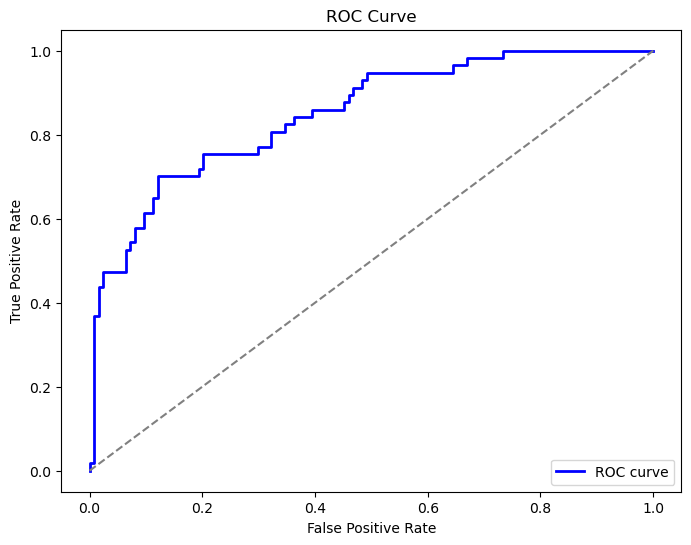

In [11]:
# Extracting necessary columns from DataFrame
actual = df['class']
predicted = df['scored.class']
probabilities = df['scored.probability']

# Sorting predictions based on probabilities
sorted_predictions = sorted(zip(probabilities, actual), reverse=True)

# Initializing lists for true positive rate, false positive rate, and area under curve with initial values 0
tpr, fpr, auc = [0], [0], 0  

# Total number of positives (actual)
num_positive = sum(actual)

# Total number of negatives (actual)
num_negative = len(actual) - num_positive

# Calculating TPR, FPR, and AUC
for prob, true_label in sorted_predictions:
    tpr.append(tpr[-1] + (true_label == 1) / num_positive)   # Appending tpr list with the cumulative sum of true positive labels
    fpr.append(fpr[-1] + (true_label == 0) / num_negative)  # Appending fpr list with the cumulative sum of false positive labels
    auc = auc + (tpr[-1] + tpr[-2]) / 2 * (fpr[-1] - fpr[-2])  # Calculating auc by summing the areas of trapezoids formed by adjacent points on the ROC curve


# Plotting ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve') 
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.legend(loc='lower right')
plt.show()

As we can see, this ROC curve approaches the top-left of the plot, suggesting a well-performing model

## Results for metrics 

In [12]:
# Use the functions
accuracy = accuracy_calculation(df['class'], df['scored.class'])
precision = precision_calculation(df['class'], df['scored.class'])
sensitivity = sensitivity_calculation(df['class'], df['scored.class'])
specificity = specificity_calculation(df['class'], df['scored.class'])
f1_score = f1_score_calculation(df['class'], df['scored.class'])

# Print the results
print("The accuracy of the prediction is:", round(accuracy*100,2), "%")
print("The precision of the prediction is:", round(precision*100,2), "%")
print("The sensitivity of the prediction is:", round(sensitivity*100,2), "%")
print("The specificity of the prediction is:", round(specificity*100,2), "%")
print("The F1 score of the prediction is:", round(f1_score*100,2), "%")
print("The AUC is:", round(auc,4)) 

The accuracy of the prediction is: 80.66 %
The precision of the prediction is: 84.38 %
The sensitivity of the prediction is: 47.37 %
The specificity of the prediction is: 95.97 %
The F1 score of the prediction is: 60.67 %
The AUC is: 0.8503


These are the results for the metrics calculated by the functions defined by us. Now, we will use the scikit-learn library to calculate these same metrics using this package and compare them with our resulting metrics

# Metrics with scikit-learn library

## Metrics

In [13]:
# Import the necessary packages
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

# Scikit-learn functions
accuracy_sklearn = accuracy_score(actual, predicted)
precision_sklearn = precision_score(actual, predicted)
sensitivity_sklearn = recall_score(actual, predicted)  # Recall is equivalent to sensitivity
specificity_sklearn = recall_score(actual, predicted, pos_label=0)  # Specificity is calculated for the negative class
f1_score_sklearn = f1_score(actual, predicted)

# Confusion matrix
conf_matrix_sklearn = confusion_matrix(actual, predicted)

# Classification report
classification_report_sklearn = classification_report(actual, predicted)

print("Scikit-learn Accuracy:", round(accuracy_sklearn*100,2), "%")
print("Scikit-learn Precision:", round(precision_sklearn*100,2), "%")
print("Scikit-learn Sensitivity (Recall):", round(sensitivity_sklearn*100,2), "%")
print("Scikit-learn Specificity:", round(specificity_sklearn*100,2), "%")
print("Scikit-learn F1 Score:", round(f1_score_sklearn*100,2), "%")
print("Scikit-learn Confusion Matrix:\n", conf_matrix_sklearn)
print("Scikit-learn Classification Report:\n", classification_report_sklearn)

Scikit-learn Accuracy: 80.66 %
Scikit-learn Precision: 84.38 %
Scikit-learn Sensitivity (Recall): 47.37 %
Scikit-learn Specificity: 95.97 %
Scikit-learn F1 Score: 60.67 %
Scikit-learn Confusion Matrix:
 [[119   5]
 [ 30  27]]
Scikit-learn Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.96      0.87       124
           1       0.84      0.47      0.61        57

    accuracy                           0.81       181
   macro avg       0.82      0.72      0.74       181
weighted avg       0.81      0.81      0.79       181



By way of comparison, in general, the results for the pre-built functions in the scikit-learn library match the results for the customized functions very well, indicating that both implementations are consistent and accurate, and provide a reliable evaluation metric for assessing the performance of a classification model on a given dataset.

## ROC curve and AUC

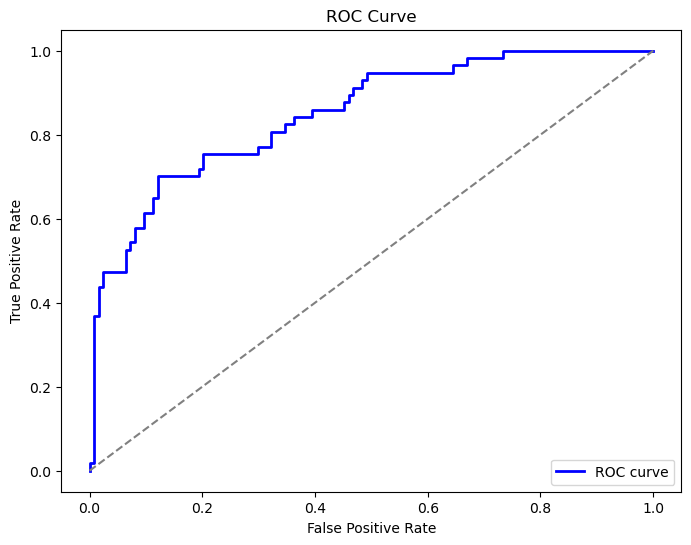

AUC Score: 0.8503


In [14]:
# Import the necessary packages
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(actual, probabilities)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Calculate AUC
auc_score = auc(fpr, tpr)
print("AUC Score:", round(auc_score,4))

The ROC curve and the AUC value are exactly the same as those calculated manually without using any packages.

# Conclusions

When comparing the metrics obtained from the user-defined function with those from the scikit-learn package, we observed that they are exactly the same, including both ROC curves.

Based on the metrics of the model:

- **Accuracy (80.66%):** The model correctly predicts the class of 80.66% of the observations, indicating a reasonably good overall performance.
- **Precision (84.38%):** Out of all the predicted positive instances, 84.38% are actually positive. This indicates that when the model predicts a positive outcome, it is often correct.
- **Sensitivity (47.37%):** A sensitivity of 47.37% suggests that the model may not perform as well in identifying all positive cases.
- **Specificity (95.97%):** A specificity of 95.97% suggests that the model is good at identifying negative cases.
- **F1 Score (60.67%):** The F1 score of 60.67% indicates that the model achieves a balance between precision and sensitivity, although it may not excel in both metrics individually, specially given the low sensitivity score.
- **AUC (0.8503):** The AUC of the ROC curve is 0.8503, which suggests that the model has a good ability to distinguish between positive and negative classes.

Overall, the model seems to perform well in terms of specificity and precision, indicating that it is good at correctly identifying negative cases and making positive predictions that are likely to be correct. However, the sensitivity is relatively low, suggesting that the model may struggle with correctly identifying all positive cases.

# References

- https://www.saedsayad.com/model_evaluation_c.htm
- https://medium.com/@MohammedS/performance-metrics-for-classification-problems-in-machine-learning-part-i-b085d432082b